# Traitement Data set : sea ​​level rise

## Partie import google sheet depuis drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
from matplotlib import style 
style.use('ggplot') or plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1mT2KTU04vbQklkO3_XbdmZAkSj4UWKFJnLhF3DRVKsM/edit#gid=0')

In [0]:
sheet = wb.worksheet('sea​​levelrise')

In [0]:
data = sheet.get_all_values()

## Creation Data Frame et nettoyage du data set

In [0]:
df = pd.DataFrame(data)

In [9]:
df.head()

0  ...                        4
0     Column1  ...                  Column5
1        Year  ...  NOAA Adjusted Sea Level
2  1880-03-15  ...                         
3  1881-03-15  ...                         
4  1882-03-15  ...                         

[5 rows x 5 columns]

In [0]:
# Le lancer 2 fois

for loop in range(2):
  df.columns = df.iloc[0]
  df = df.iloc[1:]
  df.reset_index(drop=True, inplace=True)


In [11]:
# Test de la boucle for
df.head()


0        Year  ... NOAA Adjusted Sea Level
0  1880-03-15  ...                        
1  1881-03-15  ...                        
2  1882-03-15  ...                        
3  1883-03-15  ...                        
4  1884-03-15  ...                        

[5 rows x 5 columns]

In [12]:
# Infos sur les dtype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Year                      135 non-null    object
 1   CSIRO Adjusted Sea Level  135 non-null    object
 2   Lower Error Bound         135 non-null    object
 3   Upper Error Bound         135 non-null    object
 4   NOAA Adjusted Sea Level   135 non-null    object
dtypes: object(5)
memory usage: 5.4+ KB


In [0]:
# Traitement de la colonne des 'Year' : mise au format date et keep only period 'Y
df['Year'] =  pd.to_datetime(df['Year']).dt.to_period('Y')

In [14]:
# Test modification datetime
df.head()

0  Year CSIRO Adjusted Sea Level  ... Upper Error Bound NOAA Adjusted Sea Level
0  1880                        0  ...       0.952755905                        
1  1881              0.220472441  ...       1.173228345                        
2  1882             -0.440944881  ...       0.464566929                        
3  1883             -0.232283464  ...        0.66535433                        
4  1884              0.590551181  ...       1.464566928                        

[5 rows x 5 columns]

In [0]:
# Suppression des colonnes non déterminantes : 
 df.drop(['Lower Error Bound','Upper Error Bound','NOAA Adjusted Sea Level'],axis = 1, inplace=True)

In [16]:
# Test des suppresions
df.head()

0  Year CSIRO Adjusted Sea Level
0  1880                        0
1  1881              0.220472441
2  1882             -0.440944881
3  1883             -0.232283464
4  1884              0.590551181

In [0]:
# Rename column 'CSIRO Adjusted Sea Level'
df.rename({'CSIRO Adjusted Sea Level' : 'CSIRO_Adjusted_Sea_Level' }, axis=1, inplace=True)

In [18]:
# Test rename column
df.head()

0  Year CSIRO_Adjusted_Sea_Level
0  1880                        0
1  1881              0.220472441
2  1882             -0.440944881
3  1883             -0.232283464
4  1884              0.590551181

In [0]:
# Traitement level sea : convert float
df['CSIRO_Adjusted_Sea_Level'] = pd.to_numeric(df['CSIRO_Adjusted_Sea_Level'], errors='coerce')

In [20]:
# Test des valeurs Nan
df.isna().sum()

0
Year                        0
CSIRO_Adjusted_Sea_Level    1
dtype: int64

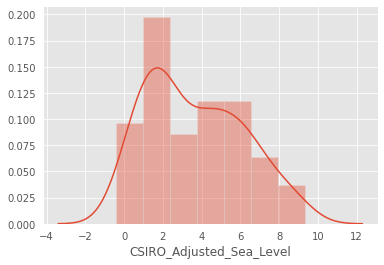

In [21]:
# Test distribution to choice : mean ou median
sns.distplot(df.CSIRO_Adjusted_Sea_Level)

In [0]:
# Replace NAN by median : 
df['CSIRO_Adjusted_Sea_Level'].fillna(df.CSIRO_Adjusted_Sea_Level.median() , inplace = True)

In [23]:
# Test replace Nan
df.isna().sum()

0
Year                        0
CSIRO_Adjusted_Sea_Level    0
dtype: int64

## Visualisation des données

In [0]:
# Traitement message erreur visualisation : 
# float() argument must be a string or a number, not 'Period' : nous allons transfomer les 'Year' en période pour la visualisation : 
df  = df.set_index('Year')
df.index=df.index.to_series().astype(str)

In [25]:
# Test traitement period
df.tail()

0     CSIRO_Adjusted_Sea_Level
Year                          
2010                  8.901575
2011                  8.964567
2012                  9.326772
2013                  8.980315
2014                  3.312992

In [0]:
# Replace value 2014 par réajust : 8.663700393 (NOAA Adjusted Sea Level) 3.312992) = 8.663700393
df.loc['2014': ] = 8.663700393


In [27]:
df.tail()

0     CSIRO_Adjusted_Sea_Level
Year                          
2010                  8.901575
2011                  8.964567
2012                  9.326772
2013                  8.980315
2014                  8.663700

In [0]:
# repositionnement de la colonne 'Year'
df = df.reset_index()

In [29]:
df.head()

0  Year  CSIRO_Adjusted_Sea_Level
0  1880                  0.000000
1  1881                  0.220472
2  1882                 -0.440945
3  1883                 -0.232283
4  1884                  0.590551

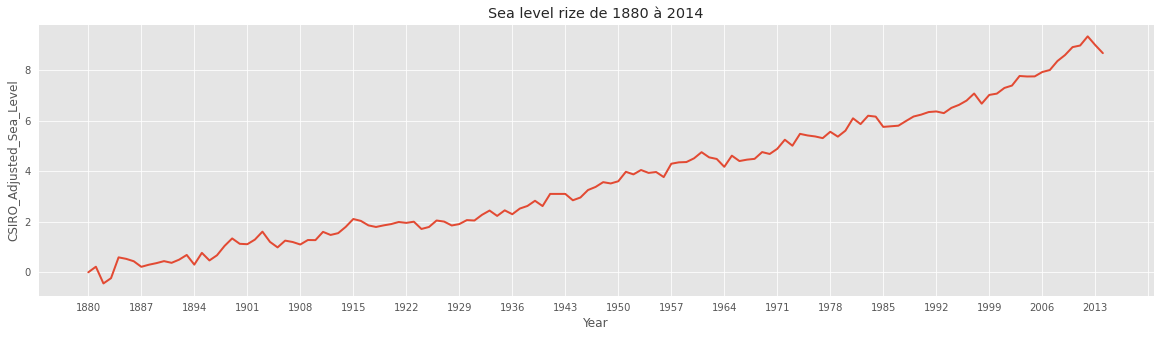

In [30]:
# Visualisation avec seaborn

fig, ax = plt.subplots(0,0, figsize=(20, 5))
sns.lineplot(x='Year', y='CSIRO_Adjusted_Sea_Level', data=df, linewidth=2).set_title('Sea level rize de 1880 à 2014')

#plt.xlim(1,100)
#plt.margins(0)
plt.gca().xaxis.set_ticks(range(0, 141, 7), minor = False)
#plt.xticks(df["Year"][::9], df["Year"][::9])

plt.show()

fig.savefig("SeaLevelRize.png")

## Export CSV pour correlation

In [0]:
df.to_csv('exportMergeSeaLevelRize.csv', index = False)